In [1]:
%matplotlib inline
from google.cloud import storage
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import io
import pandas as pd
import numpy as np

In [2]:
# Define bucket and blob prefix

bucket_name = 'catflap-photos-raw'
prefix = '2020-05-11'

In [3]:
# Set up bucket

client = storage.Client()
bucket = client.get_bucket(bucket_name)

In [4]:
# Get list of blob names

blobs = bucket.list_blobs(prefix=prefix)
blob_list = [blob.name for blob in blobs]

In [5]:
# Create dataframe of blob names

blob_df = pd.DataFrame()
blob_df['name'] = pd.Series(blob_list)

print(blob_df.shape)
blob_df.head()

(5471, 1)


,name
0,2020-05-11_080042.jpg
1,2020-05-11_080050.jpg
2,2020-05-11_080058.jpg
3,2020-05-11_080105.jpg
4,2020-05-11_080112.jpg


In [6]:
# Write to CSV file to upload to Google Sheet

blob_df['blob_location'] = 'gs://' + bucket_name + '/' + blob_df.name
extra_columns = ['contains_cat','in_or_out','entering_or_exiting','seen_through','proportion_of_cat']
for column in extra_columns:
    blob_df[column] = np.nan

blob_df[['blob_location']+extra_columns].to_csv('~/cat_detection_labels_'+prefix+'.csv', index=False)

In [7]:
blob_df['timestamp'] = pd.to_datetime(blob_df.name, format='%Y-%m-%d_%H%M%S.jpg')

blob_df.head()

,name,blob_location,contains_cat,in_or_out,entering_or_exiting,seen_through,proportion_of_cat,timestamp
0,2020-05-11_080042.jpg,gs://catflap-photos-raw/2020-05-11_080042.jpg,NaN,NaN,NaN,NaN,NaN,2020-05-11 08:00:42
1,2020-05-11_080050.jpg,gs://catflap-photos-raw/2020-05-11_080050.jpg,NaN,NaN,NaN,NaN,NaN,2020-05-11 08:00:50
2,2020-05-11_080058.jpg,gs://catflap-photos-raw/2020-05-11_080058.jpg,NaN,NaN,NaN,NaN,NaN,2020-05-11 08:00:58
3,2020-05-11_080105.jpg,gs://catflap-photos-raw/2020-05-11_080105.jpg,NaN,NaN,NaN,NaN,NaN,2020-05-11 08:01:05
4,2020-05-11_080112.jpg,gs://catflap-photos-raw/2020-05-11_080112.jpg,NaN,NaN,NaN,NaN,NaN,2020-05-11 08:01:12


In [8]:
# Start on 

hhmm = '1200'
start_timetamp = pd.to_datetime('2020-05-11_'+hhmm, format='%Y-%m-%d_%H%M')
blob_ctr = blob_df[blob_df.timestamp>start_timetamp].index[0]

2020-05-11_120007.jpg


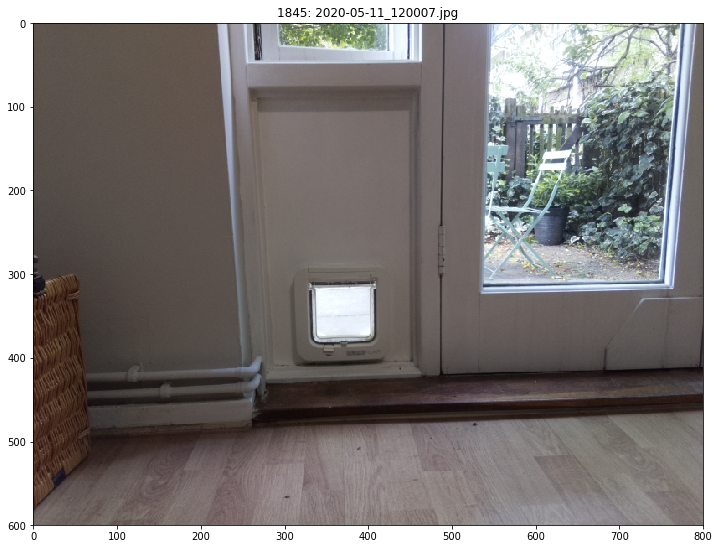

In [9]:
# Show next image

blob_name = blob_df.iloc[blob_ctr]['name']
blob = bucket.blob(blob_name)
blob_str = blob.download_as_string()
bytes_io = io.BytesIO(blob_str)
img = mpimg.imread(bytes_io, format='jpg')

# Show it
plt.figure(figsize=(12,10))
plt.imshow(img)
plt.title(str(blob_ctr) + ': ' + blob_name)

print(blob_name)

# Move on to next blob
blob_ctr += 1